In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/SP500 (1).csv
/kaggle/input/datapp/priceped.csv


In [9]:
import statistics as st


In [10]:
import pandas as pd
dataset=pd.read_csv('/kaggle/input/dataset/SP500 (1).csv')

In [11]:
data=pd.read_csv('/kaggle/input/datapp/priceped.csv')

In [12]:
data

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,shift,change,ma7,ma14,ma30,diff_close,diff_predlr,Close_predlr
0,1288,2015-02-17,2096.469971,2101.300049,2089.800049,2100.340088,2100.340088,3361750000,2096.989990,0.001598,2075.020019,2051.317871,2040.180680,3.350098,3.350098,2103.690186
1,1289,2015-02-18,2099.159912,2100.229980,2092.149902,2099.679932,2099.679932,3370020000,2100.340088,-0.000314,2081.335728,2058.283578,2042.817346,-0.660156,-0.660156,2103.030030
2,1290,2015-02-19,2099.250000,2102.129883,2090.790039,2097.449951,2097.449951,3247100000,2099.679932,-0.001062,2088.580008,2063.726432,2045.978678,-2.229981,-2.229981,2100.800049
3,1291,2015-02-20,2097.649902,2110.610107,2085.439941,2110.300049,2110.300049,3281600000,2097.449951,0.006127,2094.538574,2071.962865,2048.792013,12.850098,12.850098,2113.650147
4,1292,2015-02-23,2109.830078,2110.050049,2103.000000,2109.659912,2109.659912,3093680000,2110.300049,-0.000303,2100.414272,2078.306431,2050.376013,-0.640137,-0.640137,2113.010010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,2511,2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296540000,3224.010010,-0.000195,3207.012835,3175.707834,3143.865983,-0.630127,-0.630127,3226.729981
1224,2512,2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2160680000,3223.379883,0.005128,3213.935687,3184.456404,3148.801644,16.530029,16.530029,3243.260010
1225,2513,2019-12-27,3247.229980,3247.929932,3234.370117,3240.020020,3240.020020,2428670000,3239.909912,0.000034,3220.721401,3191.178554,3153.667643,0.110108,0.110108,3243.370118
1226,2514,2019-12-30,3240.090088,3240.919922,3216.570068,3221.290039,3221.290039,3013290000,3240.020020,-0.005781,3225.028565,3197.273560,3157.822982,-18.729981,-18.729981,3224.640137


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import math
from numpy.random import choice
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Import Model Packages for reinforcement learning
from keras import layers, models, optimizers
from keras import backend as K
from collections import namedtuple, deque

2024-06-29 10:01:09.439567: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-29 10:01:09.439687: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-29 10:01:09.551071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
data2=data

In [16]:
data=data2

In [17]:
len(data)

1228

<Axes: >

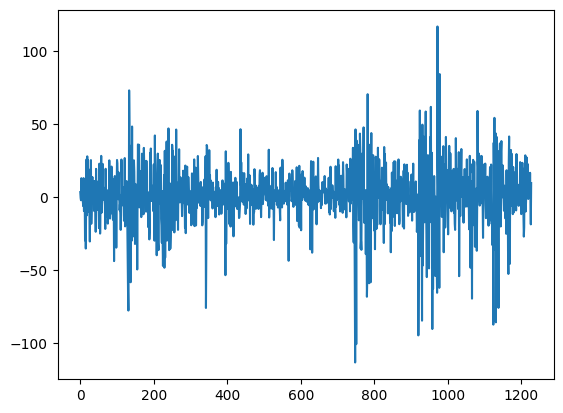

In [18]:
data2['diff_predlr'].plot()

In [19]:
len(data)

1228

In [20]:
data=data2

<Axes: >

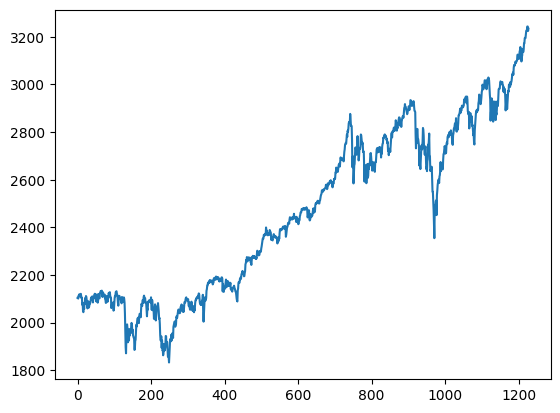

In [21]:
data['Close_predlr'].plot()

In [24]:
X=data["Close_predlr"].to_list()
X=[float(x) for x in X]
validation_size = 0.2

train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]

In [25]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import Adam
from IPython.core.debugger import set_trace

import numpy as np
import random
from collections import deque

class Agent:
    def __init__(self, state_size, is_eval=False, model_name=""):
       
        self.state_size = state_size 
        self.action_size = 3 # sit, buy, sell
        self.memory = deque(maxlen=1000)
        self.inventory = []
        self.model_name = model_name
        self.is_eval = is_eval

        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        

        self.model = load_model(model_name) if is_eval else self._model()
        self.modelt = load_model(model_name) if is_eval else self._modelt()

    #Deep Q Learning model- returns the q-value when given state as input 
    def _model(self):
        model = Sequential()
        model.add(Dense(units=64, input_dim=self.state_size, activation="relu"))
        
        model.add(Dense(units=32, activation="relu"))
        model.add(Dense(units=8, activation="relu"))
        
        model.add(Dense(self.action_size, activation="linear"))
        model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))
        
        return model
    def _modelt(self):
        model = Sequential()
      
        model.add(Dense(units=64, input_dim=self.state_size, activation="relu"))
        
        model.add(Dense(units=32, activation="relu"))
        model.add(Dense(units=8, activation="relu"))
         
        model.add(Dense(self.action_size, activation="linear"))
        model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))
        
        return model
    
    
    def act(self, state): 
       
        if not self.is_eval and random.random() <= self.epsilon:
            return random.randrange(self.action_size)        
        options = self.model.predict(state)
        
        return np.argmax(options[0])

    def expReplay(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        for i in range(l - batch_size + 1, l):
            mini_batch.append(self.memory[i])
        
        
        for state, action, reward, next_state, done in mini_batch:
            target = reward 
            if not done:
                target = reward + self.gamma * np.amax(self.modelt.predict(next_state)[0])     
               
            target_f = self.model.predict(state)
                
            target_f[0][action] = target
            #train and fit the model where state is X and target_f is Y, where the target is updated. 
            self.model.fit(state, target_f, epochs=1, verbose=0)
            
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
    def expReplay2(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        for i in range(l - batch_size + 1, l):
            mini_batch.append(self.memory[i])
        
        # the memory during the training phase. 
        for state, action, reward, next_state, done in mini_batch:
            target = reward # reward or Q at time t    
            #update the Q table based on Q table equation
            #set_trace()
            if not done:
                #set_trace()
                #max of the array of the predicted. 
                target = reward + self.gamma * np.amax(self.modelt.predict(next_state)[0])     
                
            # Q-value of the state currently from the table    
            target_f = self.model.predict(state)
            # Update the output Q table for the given action in the table     
            target_f[0][action] = target
            #train and fit the model where state is X and target_f is Y, where the target is updated. 
            self.model.fit(state, target_f, epochs=1, verbose=0)
            self.modelt.set_weights(self.model.get_weights())
            
            
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [26]:
import numpy as np
import math

# prints formatted price
def formatPrice(n):
    return ("-$" if n < 0 else "$") + "{0:.2f}".format(abs(n))


def sigmoid(x):
    return 1 / (1 + math.exp(-x))



def getState(data, t, n):    
    d = t - n + 1
    block = data[d:t + 1] if d >= 0 else -d * [data[0]] + data[0:t + 1]
    res = []
    for i in range(n - 1):
        res.append(sigmoid(block[i + 1] - block[i]))
    return np.array([res])


def plot_behavior(data_input, states_buy, states_sell, profit):
    fig = plt.figure(figsize = (15,5))
    plt.plot(data_input, color='r', lw=2.)
    plt.plot(data_input, '^', markersize=10, color='m', label = 'Buying signal', markevery = states_buy)
    plt.plot(data_input, 'v', markersize=10, color='k', label = 'Selling signal', markevery = states_sell)
    plt.title('Total gains: %f'%(profit))
    plt.legend()
   
    plt.show()

In [27]:
import tensorflow as tf

# Check if TensorFlow is using GPU
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [28]:
from tqdm import tqdm
from IPython.display import clear_output

In [ ]:
from tqdm import tqdm
from IPython.core.debugger import set_trace
window_size = 1
me=st.mean(X)

agent = Agent(window_size)
#In this step we feed the closing value of the stock price 
data = X_train
l = len(data)-1
#
batch_size = 32
#An episode represents a complete pass over the data.
episode_count = 10

for e in range(episode_count + 1):
    print("Running episode " + str(e) + "/" + str(episode_count))
    state = getState(data, 0, window_size + 1)
    #set_trace()
    total_profit = 0
    agent.inventory = []
    states_sell = []
    states_buy = []
    cum=[]
    for t in tqdm(range(l), disable=True):
        print(t)
        action = agent.act(state)    
        # sit
        next_state = getState(data, t + 1, window_size + 1)
        reward = 0

        if action == 1: # buy
            agent.inventory.append(data[t])
            states_buy.append(t)
            cum.append(-data[t])
            #print("Buy: " + formatPrice(data[t]))

        elif action == 2 and len(agent.inventory) > 0: # sell
            bought_price = agent.inventory.pop(0)      
            reward = (data[t] - bought_price)/100
            total_profit += data[t] - bought_price
            states_sell.append(t)
            cum.append(data[t])
            #print("Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(data[t] - bought_price))
#         reward+=sum(cum)*
            if int(me-X[0])<0:
                if sum(cum)<0:
                   reward-=1
               
               
    
        #breathe or not
        
        done = True if t == l - 1 else False
        #appends the details of the state action etc in the memory, which is used further by the exeReply function
        agent.memory.append((state, action, reward, next_state, done))
        state = next_state

        if done:
            print("--------------------------------")
            print("Total Profit: " + formatPrice(total_profit))
            print("--------------------------------")
            #set_trace()
            #pd.DataFrame(np.array(agent.memory)).to_csv("Agent"+str(e)+".csv")
            #Chart to show how the model performs with the stock goin up and down for each 
            plot_behavior(data,states_buy, states_sell, total_profit)
            s=0
            mini=1e5
            for i in range(len(cum)):
                s=s+cum[i]
                mini=min(s,mini)
            print(mini)
                
        if len(agent.memory) > batch_size and t%3==1:
            agent.expReplay2(batch_size) 
        
        elif len(agent.memory) > batch_size:
            agent.expReplay(batch_size)    
            

    if e % 2 == 0:
        agent.model.save('/kaggle/working/"model.h5')


Running episode 0/10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

In [26]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000


In [7]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...,...
2511,2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296540000
2512,2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2160680000
2513,2019-12-27,3247.229980,3247.929932,3234.370117,3240.020020,3240.020020,2428670000
2514,2019-12-30,3240.090088,3240.919922,3216.570068,3221.290039,3221.290039,3013290000


In [8]:
data=dataset[:1256]

In [9]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...,...
1251,2014-12-22,2069.280029,2078.760010,2069.280029,2078.540039,2078.540039,3369520000
1252,2014-12-23,2081.479980,2086.729980,2079.770020,2082.169922,2082.169922,3043950000
1253,2014-12-24,2083.250000,2087.560059,2081.860107,2081.879883,2081.879883,1416980000
1254,2014-12-26,2084.300049,2092.699951,2084.300049,2088.770020,2088.770020,1735230000


In [10]:
data=data[['Date','Close']]

In [11]:
data

,Date,Close
0,2010-01-04,1132.989990
1,2010-01-05,1136.520020
2,2010-01-06,1137.140015
3,2010-01-07,1141.689941
4,2010-01-08,1144.979980
...,...,...
1251,2014-12-22,2078.540039
1252,2014-12-23,2082.169922
1253,2014-12-24,2081.879883
1254,2014-12-26,2088.770020
